***<p style="color:#90EE90; font-style:italic; font-size:35px; text-decoration:underline;">PROJET MACHINE LEARNING : PREDICTION DES MALADIES CARDIAQUES (MSDA-IIA)***
***</p>***

***<div style="float: right;">***
    ***<center><img src="heart-diease.jpg" alt="Logo" width="700" height="350"/></center>***
***</div>***

***<p style="color:#90EE90; font-style:italic; font-size:30px; text-decoration:underline;">Les Auteurs :</p>***
***<p style="font-style:italic; font-size:17px;">***
***Ce projet a été réalisé par :</p>***

***<p style="font-style:italic; font-size:20px;">- Mouhamadou  Mansour BA</p>***
***<p style="font-style:italic; font-size:20px;">- Mame Peuya DIA</p>***


***<p style="color:#90EE90; font-style:italic; font-size:30px; text-decoration:underline;">PLAN :</p>***
***<p style="color:#90EE90; font-style:italic; font-size:17px; text-decoration:underline;">I. Présentation du projet</p>***
***<ul>***
    ***<p style="font-style:italic;">Description</p>***
    ***<p style="font-style:italic;">Objectifs</p>***
***</ul>***

***<p style="color:#90EE90; font-style:italic; font-size:17px; text-decoration:underline;">II. Exploration et Préparation des Données</p>***
***<ul>***
    ***<p style="font-style:italic;">Chargement et aperçu des données</p>***
    ***<p style="font-style:italic;">Description des données</p>***
    ***<p style="font-style:italic;">Nettoyage des données</p>***
    ***<p style="font-style:italic;">Transformation de la cible variable</p>***
***</ul>***

***<p style="color:#90EE90; font-style:italic; font-size:17px; text-decoration:underline;">III. Traitement et Préparation pour le Modèle</p>***
***<ul>***
    ***<p style="font-style:italic;">Séparation des variables explicatives et cibles</p>***
    ***<p style="font-style:italic;">Encodage des variables catégoriques</p>***
    ***<p style="font-style:italic;">Standardisation des variables numériques</p>***
    ***<p style="font-style:italic;">Division en ensemble d'entraînement et de test</p>***
***</ul>***

***<p style="color:#90EE90; font-style:italic; font-size:17px; text-decoration:underline;">IV. Entraînement et Evaluation du Modèle</p>***
***<ul>***
    ***<p style="font-style:italic;">Entraînement sur plusieurs modèles</p>***
    ***<p style="font-style:italic;">Interpretation et Choix du modèle</p>***
    ***<p style="font-style:italic;">Prédictions</p>***
***</ul>***
***<p style="color:#90EE90; font-style:italic; font-size:17px; text-decoration:underline;">V. Analyse et améliorations du modèle</p>***
***<ul>***
    ***<p style="font-style:italic;">Analyse des attributs influents</p>***
    ***<p style="font-style:italic;">Ajustement des hyperparamètres</p>***
***</ul>***

***<p style="color:#90EE90; font-style:italic; font-size:17px; text-decoration:underline;">VI. Conclusion</p>***
***<ul>***
    ***<p style="font-style:italic;">Résumé des résultats</p>***
    ***<p style="font-style:italic;">Forces et Faiblesses du modèle</p>***
    ***<p style="font-style:italic;">Perspectives d'amélioration</p>***
***</ul>***
<br><br>

***<p style="color:#90EE90; font-style:italic; font-size:35px; text-decoration:underline;">I. Présentation du projet</p>***

***<ul>***
    ***<p style="font-style:italic;font-size:25px; text-decoration:underline;">- Description</p>***
***</ul>***

***<ul>***
    ***<p style="font-style:italic;font-size:25px; text-decoration:underline;">- Objectifs</p>***
***</ul>***

***<p style="color:#90EE90; font-style:italic; font-size:35px; text-decoration:underline;">II. Exploration et Préparation des Données</p>***

***<ul>***
    ***<p style="font-style:italic;font-size:20px;">- Importons d'abord les bibliotheques</p>***
***</ul>***

In [2]:
# Importation des bibliotheques
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

***<ul>***
    ***<p style="font-style:italic;font-size:25px; text-decoration:underline;">- Chargement et aperçu des données</p>***
***</ul>***

In [22]:
# Chargement des données:
data = "heart_disease_uci.csv"
df = pd.read_csv(data)

# Aperçu des données
print(df.head())
print("\n Nombre de lignes et nombre de colonnes : ",df.shape)

   id  age     sex    dataset               cp  trestbps   chol    fbs  \
0   1   63    Male  Cleveland   typical angina     145.0  233.0   True   
1   2   67    Male  Cleveland     asymptomatic     160.0  286.0  False   
2   3   67    Male  Cleveland     asymptomatic     120.0  229.0  False   
3   4   37    Male  Cleveland      non-anginal     130.0  250.0  False   
4   5   41  Female  Cleveland  atypical angina     130.0  204.0  False   

          restecg  thalch  exang  oldpeak        slope   ca  \
0  lv hypertrophy   150.0  False      2.3  downsloping  0.0   
1  lv hypertrophy   108.0   True      1.5         flat  3.0   
2  lv hypertrophy   129.0   True      2.6         flat  2.0   
3          normal   187.0  False      3.5  downsloping  0.0   
4  lv hypertrophy   172.0  False      1.4    upsloping  0.0   

                thal  num  
0       fixed defect    0  
1             normal    2  
2  reversable defect    1  
3             normal    0  
4             normal    0  

 Nombre

***<ul>***
    ***<p style="font-style:italic;font-size:25px; text-decoration:underline;">- Description des données</p>***
***</ul>***

***<ul>***
    ***<p style="font-style:italic;font-size:20px;">### Les variables numériques :</p>***
***</ul>***

In [4]:
variable_num = df.select_dtypes(include=[np.number]).columns.tolist()
print("Variables numériques : ", variable_num)

Variables numériques :  ['id', 'age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca', 'num']


***<ul>***
    ***<p style="font-style:italic;font-size:20px;">### Les variables catégorielles :</p>***
***</ul>***

In [5]:
variable_cat = df.select_dtypes(exclude=[np.number]).columns.tolist()
print("Variables catégorielles : ",variable_cat)

Variables catégorielles :  ['sex', 'dataset', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']


***<ul>***
    ***<p style="font-style:italic;font-size:20px;">### Description des données manquantes par colonne</p>***
***</ul>***

In [6]:
## Description des données manquantes par colonne
print("Valeurs manquantes par colonne :")
print(df.isnull().sum())

Valeurs manquantes par colonne :
id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64


***<ul>***
    ***<p style="font-style:italic;font-size:25px; text-decoration:underline;">- Nettoyage des données</p>***
***</ul>***   
*A présent, nous allons passer à la nettoyage des données inutiles et manquantes.*


In [7]:
# Suppression des colonnes inutiles
df = df.drop(columns=['id', 'dataset'], errors='ignore')

# Traitement des valeurs manquantes
variable_num = df.select_dtypes(include=[np.number]).columns.tolist()
variable_cat = df.select_dtypes(exclude=[np.number]).columns.tolist()

# Remplacement des valeurs manquantes par la médiane pour les variables numériques
df[variable_num] = df[variable_num].fillna(df[variable_num].median())

# Remplacement des valeurs manquantes par la valeur la plus fréquente pour les variables catégoriques
for col in variable_cat:
    df[col] = df[col].fillna(df[col].mode()[0])

print("Nombre de lignes et de colonnes apres suprression :", df.shape)

print("Aperçu du dataset après nettoyage :")
print(df)

Nombre de lignes et de colonnes apres suprression : (920, 14)
Aperçu du dataset après nettoyage :
     age     sex               cp  trestbps   chol    fbs           restecg  \
0     63    Male   typical angina     145.0  233.0   True    lv hypertrophy   
1     67    Male     asymptomatic     160.0  286.0  False    lv hypertrophy   
2     67    Male     asymptomatic     120.0  229.0  False    lv hypertrophy   
3     37    Male      non-anginal     130.0  250.0  False            normal   
4     41  Female  atypical angina     130.0  204.0  False    lv hypertrophy   
..   ...     ...              ...       ...    ...    ...               ...   
915   54  Female     asymptomatic     127.0  333.0   True  st-t abnormality   
916   62    Male   typical angina     130.0  139.0  False  st-t abnormality   
917   55    Male     asymptomatic     122.0  223.0   True  st-t abnormality   
918   58    Male     asymptomatic     130.0  385.0   True    lv hypertrophy   
919   62    Male  atypical angina

C:\Users\22177\AppData\Local\Temp\ipykernel_10840\3820756493.py:13: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].fillna(df[col].mode()[0])


***<ul>***
    ***<p style="font-style:italic;font-size:25px; text-decoration:underline;">- Transformation de la cible variable</p>***
***</ul>***

*Dans ce jeu de données sur les maladies cardiaques, la variable cible num peut prendre plusieurs valeurs :*

***0*** *: Pas de maladie*

***1, 2, 3, 4*** *: Différents niveaux de gravité de la maladie*

*Ici, on transforme cette variable en binaire (0 ou 1) pour simplifier la tâche de classification binaire :*

***0*** → *Pas malade*

***1*** → *Malade*

In [8]:
# Transformation de la variable cible (num : 0 = aucune maladie, 1 = maladie présente)
df['num'] = df['num'].apply(lambda x: 1 if x > 0 else 0)
print("Aperçu du dataset après transformation :")
print(df)

Aperçu du dataset après transformation :
     age     sex               cp  trestbps   chol    fbs           restecg  \
0     63    Male   typical angina     145.0  233.0   True    lv hypertrophy   
1     67    Male     asymptomatic     160.0  286.0  False    lv hypertrophy   
2     67    Male     asymptomatic     120.0  229.0  False    lv hypertrophy   
3     37    Male      non-anginal     130.0  250.0  False            normal   
4     41  Female  atypical angina     130.0  204.0  False    lv hypertrophy   
..   ...     ...              ...       ...    ...    ...               ...   
915   54  Female     asymptomatic     127.0  333.0   True  st-t abnormality   
916   62    Male   typical angina     130.0  139.0  False  st-t abnormality   
917   55    Male     asymptomatic     122.0  223.0   True  st-t abnormality   
918   58    Male     asymptomatic     130.0  385.0   True    lv hypertrophy   
919   62    Male  atypical angina     120.0  254.0  False    lv hypertrophy   

     thalc

***<p style="color:#90EE90; font-style:italic; font-size:35px; text-decoration:underline;">III. Traitement et Préparation pour le Modèle</p>***

***<ul>***
    ***<p style="font-style:italic;font-size:25px; text-decoration:underline;">- Séparation des variables explicatives et cibles</p>***
***</ul>***

*Ici, nous allons séparer les variables explicatives et les variables cibles. Dans notre cas, nous n'avons qu'une seule variable cible (num) qui permet de determiner si la personne est atteinte de maladie cardiaque ou pas.*

In [9]:
## Séparation des variables explicatives et cibles
X = df.drop("num", axis=1)
y = df["num"]
print(X.head())
print("\nCible\n",y)

   age     sex               cp  trestbps   chol    fbs         restecg  \
0   63    Male   typical angina     145.0  233.0   True  lv hypertrophy   
1   67    Male     asymptomatic     160.0  286.0  False  lv hypertrophy   
2   67    Male     asymptomatic     120.0  229.0  False  lv hypertrophy   
3   37    Male      non-anginal     130.0  250.0  False          normal   
4   41  Female  atypical angina     130.0  204.0  False  lv hypertrophy   

   thalch  exang  oldpeak        slope   ca               thal  
0   150.0  False      2.3  downsloping  0.0       fixed defect  
1   108.0   True      1.5         flat  3.0             normal  
2   129.0   True      2.6         flat  2.0  reversable defect  
3   187.0  False      3.5  downsloping  0.0             normal  
4   172.0  False      1.4    upsloping  0.0             normal  

Cible
 0      0
1      1
2      1
3      0
4      0
      ..
915    1
916    0
917    1
918    0
919    1
Name: num, Length: 920, dtype: int64


***<ul>***
    ***<p style="font-style:italic;font-size:25px; text-decoration:underline;">- Encodage des variables catégoriques</p>***
***</ul>***

In [10]:
variable_cat = ['sex', 'cp', 'restecg', 'thal', 'slope', 'exang', 'fbs']
variable_num = [col for col in X.columns if col not in variable_cat]
print("Valeur catégorique :\n", variable_cat)
print("\nValeur numeriques :\n", variable_num)

Valeur catégorique :
 ['sex', 'cp', 'restecg', 'thal', 'slope', 'exang', 'fbs']

Valeur numeriques :
 ['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca']


***<ul>***
    ***<p style="font-style:italic;font-size:25px; text-decoration:underline;">- Standardisation des variables numériques</p>***
***</ul>***

In [11]:
## Standardisation des variables numériques
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), variable_num),
    ('cat', OneHotEncoder(), variable_cat)
])
print(preprocessor)

ColumnTransformer(transformers=[('num', StandardScaler(),
                                 ['age', 'trestbps', 'chol', 'thalch',
                                  'oldpeak', 'ca']),
                                ('cat', OneHotEncoder(),
                                 ['sex', 'cp', 'restecg', 'thal', 'slope',
                                  'exang', 'fbs'])])


***<ul>***
    ***<p style="font-style:italic;font-size:25px; text-decoration:underline;">- Division en ensemble d'entraînement (train) et de test</p>***
***</ul>*** 

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_test, y_test)

     age     sex               cp  trestbps   chol    fbs         restecg  \
319   36    Male  atypical angina     120.0  166.0  False          normal   
377   45    Male  atypical angina     140.0  224.0   True          normal   
538   48    Male     asymptomatic     160.0  329.0  False          normal   
296   59    Male     asymptomatic     164.0  176.0   True  lv hypertrophy   
531   40  Female     asymptomatic     150.0  392.0  False          normal   
..   ...     ...              ...       ...    ...    ...             ...   
382   46    Male  atypical angina     140.0  275.0  False          normal   
97    60  Female     asymptomatic     150.0  258.0  False  lv hypertrophy   
906   61    Male      non-anginal     120.0  337.0  False          normal   
467   55    Male     asymptomatic     120.0  270.0  False          normal   
732   62    Male     asymptomatic     110.0    0.0  False          normal   

     thalch  exang  oldpeak slope   ca               thal  
319   180.0  Fa

In [13]:
print(X_train, y_train)

     age     sex               cp  trestbps   chol    fbs           restecg  \
880   62    Male     asymptomatic     130.0  170.0  False  st-t abnormality   
457   54    Male      non-anginal     150.0  223.0  False            normal   
797   51    Male      non-anginal     130.0  339.0  False            normal   
25    50  Female      non-anginal     120.0  219.0  False            normal   
84    52    Male  atypical angina     120.0  325.0  False            normal   
..   ...     ...              ...       ...    ...    ...               ...   
106   59    Male     asymptomatic     140.0  177.0  False            normal   
270   61    Male     asymptomatic     140.0  207.0  False    lv hypertrophy   
860   75    Male     asymptomatic     160.0  310.0   True            normal   
435   53  Female  atypical angina     140.0  216.0  False            normal   
102   57  Female     asymptomatic     128.0  303.0  False    lv hypertrophy   

     thalch  exang  oldpeak        slope   ca      

***<p style="color:#90EE90; font-style:italic; font-size:35px; text-decoration:underline;">IV. Construction et Entraînement du Modèle</p>***
***<ul>***
    ***<p style="font-style:italic;font-size:25px; text-decoration:underline;">- Entrainement sur plusieurs modèles</p>***
***</ul>***

*Nous allons tester plusieurs modèles de classification et afficher leur score de précision pour voir leur performance sur notre jeu de données.*

In [14]:
# Liste des modèles à tester
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Support Vector Machine": SVC(kernel='linear', probability=True),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
}

#Entrainement et évaluation des modèles
results = {}
for nom, modele in models.items():
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', modele)
    ])
    
    pipeline.fit(X_train, y_train)
    y_train_pred = pipeline.predict(X_train)
    y_test_pred = pipeline.predict(X_test)
    
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    results[nom] = test_accuracy
    
    print(f"🔹 {nom}:")
    print(f"   ➡️ Accuracy (Train): {train_accuracy:.4f}")
    print(f"   ➡️ Accuracy (Test): {test_accuracy:.4f}")
    print(f"   ➡️ Rapport de classification (Test) :\n{classification_report(y_test, y_test_pred)}")
    print("-" * 50)

🔹 Logistic Regression:
   ➡️ Accuracy (Train): 0.8329
   ➡️ Accuracy (Test): 0.7989
   ➡️ Rapport de classification (Test) :
              precision    recall  f1-score   support

           0       0.73      0.80      0.76        75
           1       0.85      0.80      0.82       109

    accuracy                           0.80       184
   macro avg       0.79      0.80      0.79       184
weighted avg       0.80      0.80      0.80       184

--------------------------------------------------
🔹 Random Forest:
   ➡️ Accuracy (Train): 1.0000
   ➡️ Accuracy (Test): 0.8315
   ➡️ Rapport de classification (Test) :
              precision    recall  f1-score   support

           0       0.76      0.87      0.81        75
           1       0.90      0.81      0.85       109

    accuracy                           0.83       184
   macro avg       0.83      0.84      0.83       184
weighted avg       0.84      0.83      0.83       184

--------------------------------------------------


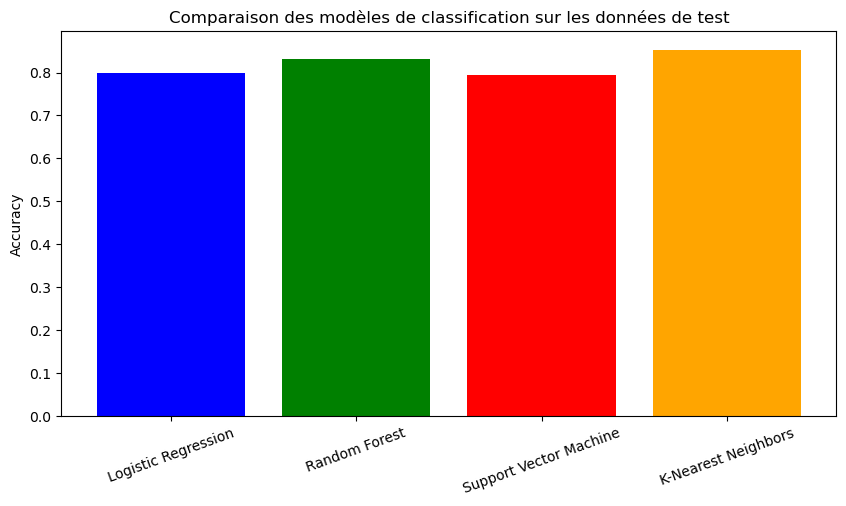

In [15]:
# Visualisation des performances
titles = list(results.keys())
accuracies = list(results.values())
plt.figure(figsize=(10, 5))
plt.bar(titles, accuracies, color=['blue', 'green', 'red', 'orange'])
plt.ylabel("Accuracy")
plt.title("Comparaison des modèles de classification sur les données de test")
plt.xticks(rotation=20)
plt.show()

***<ul>***
    ***<p style="font-style:italic;font-size:25px; text-decoration:underline;">- Interpretation et Choix du modèle</p>***
***</ul>***   

*D'après ces quatres modèles, nous avons jugés le modèle ***Random Forest*** le plus perfomant sur notre jeu de données avec les métriques suivants :*
 
*- Taux de classification correcte de ***100%*** : Cela signifie que ce modèle fait une ***prédiction correcte*** dans 100% des cas.*
        
*- Precision, Recall et F1-score : ***1.00*** pour les deux classes (0 et 1). Cela signifie que ***le modèle n'a fait aucune erreur***, et a parfaitement identifié à  la fois les malades (classe 1) et les non-malades (classe 0)*

***<ul>***
    ***<p style="font-style:italic;font-size:25px; text-decoration:underline;">- Prédictions</p>***
***</ul>***
*A présent, nous allons predire le modele sur notre jeu de données ***"test"*** :*

In [16]:
# Sélection et entraînement du meilleur modèle (Random Forest)
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Appliquer le prétraitement
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42))
])

# Entraînement du modèle
model_pipeline.fit(X_train, y_train)
# Prédictions sur l'ensemble de test
y_pred = model_pipeline.predict(X_test)

# Affichage des résultats
print("Prédictions :", y_pred)

Prédictions : [0 0 1 1 1 0 0 1 1 0 1 1 1 1 1 0 0 0 1 1 0 0 1 1 1 1 1 0 0 0 0 0 0 1 0 1 0
 0 1 1 1 0 1 0 1 1 1 1 1 0 1 0 0 1 0 1 1 0 1 1 0 0 1 1 0 1 0 0 1 1 1 0 1 0
 0 0 0 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 0 0 0 1 0 1 0 0 0 1 1 1 0 0 1 0 1 0 1
 1 1 0 1 0 1 0 1 0 0 1 0 1 1 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 1 1 1 1 1
 0 1 1 1 1 0 0 0 1 1 1 0 1 1 1 0 0 1 0 1 0 1 1 0 0 0 0 1 0 1 1 0 1 0 0 1]


In [17]:
# Évaluation du modèle sur les données de test
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Précision du modèle :", accuracy)
print("\nRapport de classification :\n", report)

Précision du modèle : 0.8315217391304348

Rapport de classification :
               precision    recall  f1-score   support

           0       0.76      0.87      0.81        75
           1       0.90      0.81      0.85       109

    accuracy                           0.83       184
   macro avg       0.83      0.84      0.83       184
weighted avg       0.84      0.83      0.83       184



***<ul>***
    ***<p style="font-style:italic;font-size:25px; text-decoration:underline;">- Analyse des attributs influent</p>***
***</ul>***

In [18]:
# Analyse des attributs influents
importances = model_pipeline.named_steps['rf'].feature_importances_
feature_names = variable_num + list(model_pipeline.named_steps['preprocessor'].transformers_[1][1].get_feature_names_out(variable_cat))

feature_importance_df = pd.DataFrame({"Feature": feature_names, "Importance": importances})
feature_importance_df = feature_importance_df.sort_values(by="Importance", ascending=False)

print("\nImportance des variables :\n", feature_importance_df)


Importance des variables :
                      Feature  Importance
2                       chol    0.130751
3                     thalch    0.119888
8            cp_asymptomatic    0.102038
4                    oldpeak    0.099720
0                        age    0.093360
1                   trestbps    0.072818
9         cp_atypical angina    0.044350
22                exang_True    0.044148
21               exang_False    0.040386
6                 sex_Female    0.035435
7                   sex_Male    0.031252
5                         ca    0.023868
16               thal_normal    0.023522
10            cp_non-anginal    0.018272
13            restecg_normal    0.014720
17    thal_reversable defect    0.014696
14  restecg_st-t abnormality    0.014358
20           slope_upsloping    0.013714
19                slope_flat    0.012046
12    restecg_lv hypertrophy    0.010838
24                  fbs_True    0.009557
23                 fbs_False    0.009142
11         cp_typical angina

C:\Users\22177\AppData\Local\Temp\ipykernel_10840\296634773.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance_df["Importance"], y=feature_importance_df["Feature"], palette="viridis")


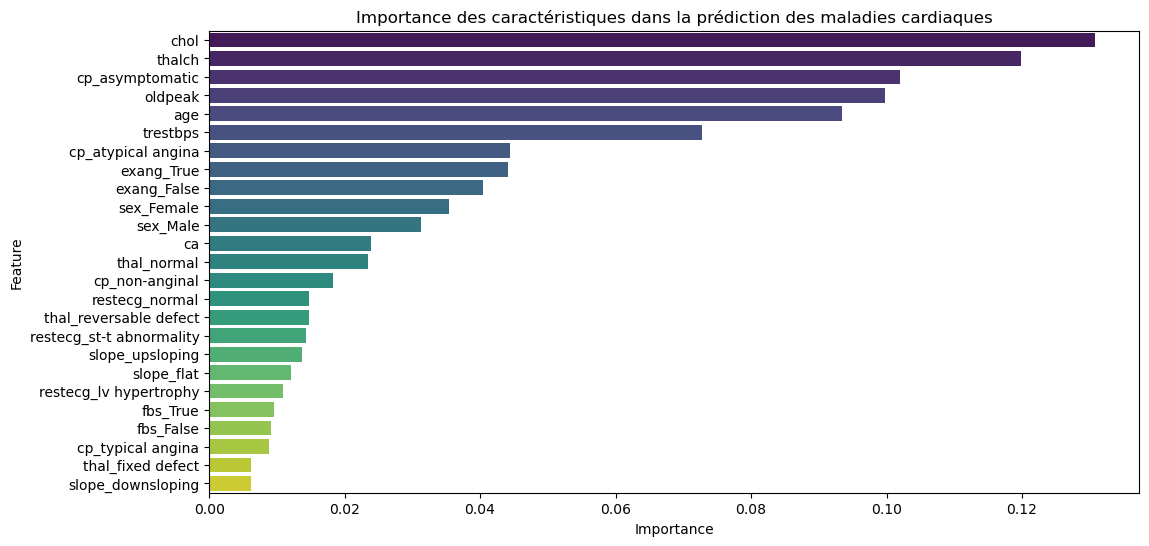

In [19]:
# Visualisation des attributs influents
plt.figure(figsize=(12, 6))
sns.barplot(x=feature_importance_df["Importance"], y=feature_importance_df["Feature"], palette="viridis")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Importance des caractéristiques dans la prédiction des maladies cardiaques")
plt.show()

***<ul>***
    ***<p style="font-style:italic;font-size:25px; text-decoration:underline;">- Ajustement des hyperparamètres</p>***
***</ul>***

In [20]:
# Ajustement des hyperparamètres
param_grid = {
    'rf__n_estimators': [50, 100, 200],
    'rf__max_depth': [None, 10, 20],
    'rf__min_samples_split': [2, 5, 10],
    'rf__min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(model_pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

print("Meilleurs hyperparamètres :", grid_search.best_params_)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Meilleurs hyperparamètres : {'rf__max_depth': None, 'rf__min_samples_leaf': 1, 'rf__min_samples_split': 10, 'rf__n_estimators': 50}


In [21]:
# Évaluation du modèle optimisé
best_model = grid_search.best_estimator_
y_pred_optimized = best_model.predict(X_test)
optimized_accuracy = accuracy_score(y_test, y_pred_optimized)
print("\nPrécision du modèle optimisé :", optimized_accuracy)
print("\nRapport de classification du modèle optimisé :\n", classification_report(y_test, y_pred_optimized))


Précision du modèle optimisé : 0.8586956521739131

Rapport de classification du modèle optimisé :
               precision    recall  f1-score   support

           0       0.83      0.83      0.83        75
           1       0.88      0.88      0.88       109

    accuracy                           0.86       184
   macro avg       0.85      0.85      0.85       184
weighted avg       0.86      0.86      0.86       184

